In [1]:
#Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import minimize

import statsmodels.api as sm

fig_width, fig_height = 15, 6

# Assignment 2 - Group 2

## Answer to Q1

You have two assets with the following properties:

X, with expected return: $\mu_{X} = 0.5\times0.03 + 0.5\times(-0.01) = 0.01$ and variance $\sigma_{X}^{2} = 0.5\times(0.03-0.01)^{2} + 0.5\times(-0.01-0.01)^{2} = 0.0004$, so the standard deviation is $\sigma_{X} = 0.02$.

Y with expected return: $\mu_{Y} = 0.5\times0.05 + 0.5\times(-0.03) = 0.01$ and variance $\sigma_{Y}^{2} = 0.5\times(0.05-0.01)^{2} + 0.5\times(-0.03-0.01)^{2} = 0.0016$, so the standard deviation is $\sigma_{Y} = 0.04$.


| Asset | $\mu$ | $\sigma$ |
|----------|----------|----------|
| $X$ | 1% | 2% |
| $Y$ | 1% | 4% |


Now assume that $X$ and $Y$ are independent random variables. The correlation between the two assets is zero.

\begin{align*}
& \mu(w) = w\mu_{X} + (1-w)\mu_{Y}, \\
& \sigma(w)^{2} = w^{2}\sigma_{X}^{2} + (1-w)^{2}\sigma_{Y}^{2} + 2w(1-w)\rho\sigma_{X}\sigma_{Y}.
\end{align*}

**Remark:** you can already see that $\mu(w) = 0.01$ for all $w$.

w* :  0.8
mu* :  0.01
sigma* :  0.01788854381999832


Text(0.5, 1.0, 'Minimum variance portfolio')

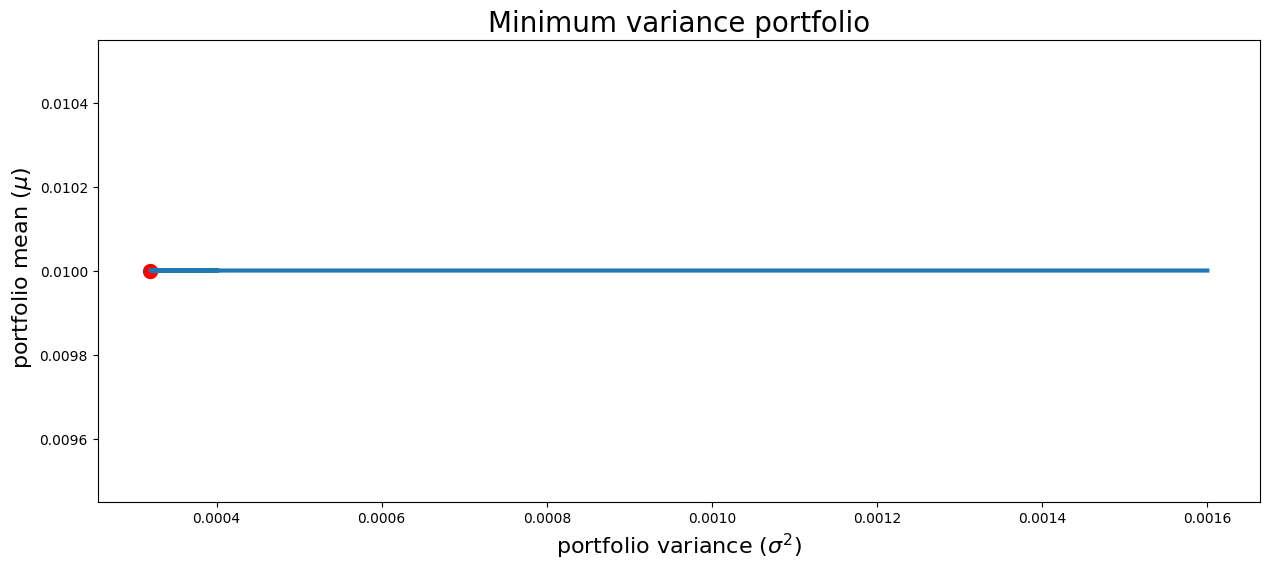

In [2]:
# Set variables
mu_X = 0.01
mu_Y = 0.01
sigma_X = 0.02
sigma_Y = 0.04
rho = 0 # Try different values of rho, the results does not change

# Initialize the weights
w = np.linspace(0,1,2000)

# compute the portfolio mean and standard deviation
mu = w*mu_X + (1-w)*mu_Y
sigma = w**2 * sigma_X**2 + (1-w)**2 * sigma_Y ** 2 + 2*rho*sigma_X*sigma_Y*w*(1-w)

w_star = (sigma_Y**2 - rho*sigma_X*sigma_Y)/(sigma_X**2 + sigma_Y**2 - 2*rho*sigma_Y*sigma_X)
mu_star = w_star*mu_X + (1-w_star)*mu_Y
sigma_star = w_star**2 * sigma_X**2 + (1-w_star)**2 * sigma_Y ** 2 + 2*rho*sigma_X*sigma_Y*w_star*(1-w_star)


print ("w* : ", w_star)
print ("mu* : ", mu_star)
print ("sigma* : ", np.sqrt(sigma_star))


# Create a figure with the specified dimensions
plt.figure(figsize=(fig_width, fig_height))

# Plotting the data
plt.plot(sigma, mu, linewidth=3)

# Adding labels and title
plt.xlabel(r'portfolio variance ($\sigma^{2})$', fontsize=16)
plt.ylabel(r' portfolio mean ($\mu$)', fontsize=16)
plt.scatter(sigma_star, mu_star, color='red', marker='o', s=100)
plt.title('Minimum variance portfolio', fontsize=20)

In [3]:
print ("Minimum variance portfolio: ", mu_star, sigma_star)

Minimum variance portfolio:  0.01 0.00032


This result is very important because it tells us that the risk of the portfolio is not the weighted average of the risks of the individual assets. The risk of the portfolio is less than the weighted average of the risks of the individual assets. This is the result of the diversification effect.

Also, as $\mathbf{\mu} = \hat{\mu}\mathbf{1}$, this is a case of homogenous portfolio.

## Proof of Q2 from notes

Given the following results of the first mutual fund theorem (about Merton coefficients):

$$
\begin{align*}
A & = \mathbf{1}^{T}\Sigma^{-1}\mathbf{\mu} \\
B & = \mathbf{\mu}^{T}\Sigma^{-1}\mathbf{\mu} \geq 0\\
C & = \mathbf{1}^{T}\Sigma^{-1}\mathbf{1} > 0\\
D & = BC - A^2 \geq 0
\end{align*}
$$

Let's prove for $B$, $C$ and $D$.

First remark is that $\Sigma$ is the covariance matrix, and under the assumption that no risk-free asset is involved, $\Sigma$ is symmetric and positive definite.

*Definition:* given a matrix $S\in\mathbb{R}^{n\times n}$ such that: $S = S^{T}$ and $rank(S)=n$, then $S$ is positive definite. This means:
- all eigenvalues of $S$ are stricly positive;
- eigenvectors of $S$ form a orthogonal basis of $\mathbb{R}^{n}$.
- the energy of $S$ is strictly positive, meaning: $x^{T}Sx > 0$ for all $x\in\mathbb{R}^{n} \setminus \{\mathbf{0}\}$.

*Proposition:* given a spd matrix $S\in\mathbb{R}^{n\times n}$, you can apply the spectral theorem to $S$ and write it as $S = Q\Lambda Q^{T}$, where:
- $Q$ is the orthogonal matrix composed by eigenvectors of $S$;
- $\Lambda$ is the diagonal matrix of eigenvalues of $S$.

**Remark:** orthogonal matrix $Q$ is such that $Q^{T}Q = I = QQ^T$.

*Proposition:* given a spd matrix $S\in\mathbb{R}^{n\times n}$, then $S^{-1}$ is also spd.

**Proof:** apply the spectral theorem to $S$ and write it as $S = Q\Lambda Q^{T}$. Then, $S^{-1} = (Q\Lambda Q^{T})^{-1} = Q\Lambda^{-1}Q^{T}$. Since $\Lambda$ is diagonal, then $\Lambda^{-1}$ is also diagonal and has all elements strictly positive. Therefore, $S^{-1}$ is spd.

This means that the inverse of the covariance matrix $\Sigma^{-1}$ is also spd!

### Proof for $B$

We need to prove that $B = \mathbf{\mu}^{T}\Sigma^{-1}\mathbf{\mu} \geq 0$.

As $\Sigma^{-1}$ is spd, then the energy of $\mathbf{\mu}^{T}\Sigma^{-1}\mathbf{\mu}$ is strictly positive, meaning: $\mathbf{\mu}^{T}\Sigma^{-1}\mathbf{\mu} > 0$.

The only case where $\mathbf{\mu}^{T}\Sigma^{-1}\mathbf{\mu} = 0$ is when $\mathbf{\mu} = \mathbf{0}$, meaning that the vector of expected returns is null.

### Proof for $C$ 

We need to prove that $C = \mathbf{1}^{T}\Sigma^{-1}\mathbf{1} > 0$, but this is trivial since the energy of $\mathbf{1}^{T}\Sigma^{-1}\mathbf{1}$ is strictly positive.

### Proof for $D$ 

In order to prove this, let's first recall the Cauchy-Schwarz inequality:

*Proposition:* The **Cauchy-Schwartz inequality** states that for any two vectors $\mathbf{v}$ and $\mathbf{w}$ in $\mathbb{R}^n$, $|\mathbf{v}^T\mathbf{w}|^2 \leq \|\mathbf{v}\|^2\|\mathbf{w}\|^2$.

Let's address explicitly the term $D = BC - A^2$:

$$
\begin{align*}
D & = BC - A^2 \\
& = \mathbf{\mu}^{T}\Sigma^{-1}\mathbf{\mu} \cdot \mathbf{1}^{T}\Sigma^{-1}\mathbf{1} - (\mathbf{1}^{T}\Sigma^{-1}\mathbf{\mu})^2
\end{align*}
$$

Recall that $\Sigma^{-1}$ is spd, so the Spectral Theorem applies and we can write $\Sigma^{-1} = Q\Lambda Q^{T}$, where $Q$ is the orthogonal matrix composed by eigenvectors of $\Sigma^{-1}$ and $\Lambda$ is the diagonal matrix of eigenvalues of $\Sigma^{-1}$.

By exploiting the the aformentioned properties, you can write $\Sigma^{-1} = \Sigma^{-1/2}\Sigma^{-1/2}$, where $\Sigma^{-1/2} = Q\Lambda^{1/2}Q^{T}$.

Let's rewrite the term $D$:

$$
\begin{align*}
D & = \mathbf{\mu}^{T}\Sigma^{-1}\mathbf{\mu} \cdot \mathbf{1}^{T}\Sigma^{-1}\mathbf{1} - (\mathbf{1}^{T}\Sigma^{-1}\mathbf{\mu})^2 \\
& = \mathbf{\mu}^{T}\Sigma^{-1/2}\Sigma^{-1/2}\mathbf{\mu} \cdot \mathbf{1}^{T}\Sigma^{-1/2}\Sigma^{-1/2}\mathbf{1} - (\mathbf{1}^{T}\Sigma^{-1/2}\Sigma^{-1/2}\mathbf{\mu})^2 \\
& = (\Sigma^{-1/2}\mathbf{\mu})^{T}(\Sigma^{-1/2}\mathbf{\mu}) \cdot (\Sigma^{-1/2}\mathbf{1})^{T}(\Sigma^{-1/2}\mathbf{1}) - ((\Sigma^{-1/2}\mathbf{1})^{T}(\Sigma^{-1/2}\mathbf{\mu}))^2
\end{align*}
$$

Let's define the following vectors:
- $\mathbf{v} = \Sigma^{-1/2}\mathbf{\mu}$;
- $\mathbf{w} = \Sigma^{-1/2}\mathbf{1}$.

Then, the term $D$ can be rewritten as:

$$
\begin{align*}
D & = \mathbf{v}^{T}\mathbf{v} \cdot \mathbf{w}^{T}\mathbf{w} - (\mathbf{w}^{T}\mathbf{v})^2 \geq 0
\end{align*}
$$

So: 

$$
\begin{align*}
(\mathbf{w}^{T}\mathbf{v})^2 \leq \mathbf{v}^{T}\mathbf{v} \cdot \mathbf{w}^{T}\mathbf{w} \\
|\mathbf{w}^{T}\mathbf{v}|^2 \leq \|\mathbf{v}\|^2\|\mathbf{w}\|^2
\end{align*}
$$

## Proof of Q3 from notes

Why $D=0$ is equivalent to state that $\mathbf{\mu} = \hat{\mu}\mathbf{1}$ with $\hat{\mu} \in \mathbb{R}$ (homogeneous portfolio)?

This is a direct consequence of the Cauchy-Schwarz inequality proved in the previous section.

The term $D$ can be rewritten as:

$$
\begin{align*}
D & = \mathbf{v}^{T}\mathbf{v} \cdot \mathbf{w}^{T}\mathbf{w} - (\mathbf{w}^{T}\mathbf{v})^2
\end{align*}
$$

If $D=0$, then the Cauchy-Schwarz inequality becomes an equality, meaning that $\mathbf{v}$ and $\mathbf{w}$ are linearly dependent. This means that $\mathbf{v} = \hat{\mu}\mathbf{w}$ with $\hat{\mu} \in \mathbb{R}$.

Recall that $\mathbf{v} = \Sigma^{-1/2}\mathbf{\mu}$ and $\mathbf{w} = \Sigma^{-1/2}\mathbf{1}$. Then, $\mathbf{\mu} = \hat{\mu}\mathbf{1}$ with $\hat{\mu} \in \mathbb{R}$.

Let's define the new vectors in the following way:

$$
\begin{align*}
\mathbf{v} & = \Sigma^{-1/2}\mathbf{\mu} = \Sigma^{-1/2}\hat{\mu}\mathbf{1} = \hat{\mu}\Sigma^{-1/2}\mathbf{1} \\
\mathbf{w} & = \Sigma^{-1/2}\mathbf{1}
\end{align*}
$$

Then, the term $D$ can be rewritten as:

$$
\begin{align*}
D & = \mathbf{v}^{T}\mathbf{v} \cdot \mathbf{w}^{T}\mathbf{w} - (\mathbf{w}^{T}\mathbf{v})^2 \\
& = (\hat{\mu}\Sigma^{-1/2}\mathbf{1})^{T}(\hat{\mu}\Sigma^{-1/2}\mathbf{1}) \cdot (\Sigma^{-1/2}\mathbf{1})^{T}(\Sigma^{-1/2}\mathbf{1}) - ((\Sigma^{-1/2}\mathbf{1})^{T}(\hat{\mu}\Sigma^{-1/2}\mathbf{1}))^2 \\
& = \| \hat{\mu}\Sigma^{-1/2}\mathbf{1} \|^2 \cdot \| \Sigma^{-1/2}\mathbf{1} \|^2 - \hat{\mu}^{2}((\Sigma^{-1/2}\mathbf{1})^{T}(\Sigma^{-1/2}\mathbf{1}))^2 \\
& = \hat{\mu}^{2} \| \Sigma^{-1/2}\mathbf{1} \|^2 \cdot \| \Sigma^{-1/2}\mathbf{1} \|^2 - \hat{\mu}^{2}((\Sigma^{-1/2}\mathbf{1})^{T}(\Sigma^{-1/2}\mathbf{1}))^2 \\
& = \hat{\mu}^{2} \| \Sigma^{-1/2}\mathbf{1} \|^4 - \hat{\mu}^{2}\| \Sigma^{-1/2}\mathbf{1} \|^4 = 0
\end{align*}
$$

## The arrogant investor problem

Assume that an arrogant investor you proposed to invest in these stocks does not want to be overly exposed to Google and Tesla. Specifically, he mentioned that he is allowed to have exposure to Google within the range of $-0.24 \leq w_{google} \leq 0.32$, and regarding Tesla within $-0.44 \leq w_{tesla} \leq 0.44$. While you are convinced by his market option, your task is to minimize the variance and ensure an expected return of at least $0.017$. Can you solve this problem? Let's discuss it.

$$
\begin{align*}
    & \min_{w} w^{T}\Sigma w \\
    & \text{s.t.}\qquad  \\
    & w^{T}\mu \ge r_{min} = 0.017, \\
    & 1^{T}w = 1.
\end{align*}
$$

During his discussion, he suggested that the best portfolio is given by:

\begin{equation*}
w_{1} = -0.12,\quad w_{2} = 0.36,\quad w_{3} = 0.42,\quad w_{4}=0.44.
\end{equation*}

1. Google
2. Amazon
3. Tesla
4. Apple

Is he correct? Let's verify.

In [4]:
"""
Data import and manipulation
"""

# Import data
google = pd.read_csv(r"data/GOOG.csv")
amazon = pd.read_csv(r"data/AMZN.csv")
tesla = pd.read_csv(r"data/TSLA.csv")
apple = pd.read_csv(r"data/AAPL.csv")

# Merge the dataframe in a single one
stocks = pd.concat([google['Close'], amazon['Close'], tesla['Close'], apple['Close'] ],axis=1)

# Assign name to colums and dates
stocks.columns = ["google", "amazon", "tesla", "apple"]
dates = google["Date"]
stocks.index = dates

# Compute log-returns
log_returns = np.log(stocks/stocks.shift(1))
log_returns = log_returns.dropna()

# Compute the covariance matrix and the mean of log-returns
sigma_logret = log_returns.cov()
mean_logret = log_returns.mean()

print("Expected returns: ")
print(mean_logret)

print("\nCovariance matrix")
print(sigma_logret)

Expected returns: 
google    0.014559
amazon    0.018679
tesla     0.032732
apple     0.017859
dtype: float64

Covariance matrix
          google    amazon     tesla     apple
google  0.004655  0.003165  0.003550  0.002350
amazon  0.003165  0.007154  0.004711  0.003212
tesla   0.003550  0.004711  0.026630  0.004951
apple   0.002350  0.003212  0.004951  0.006125


Text(0.5, 1.0, 'mean-std.dev scatter plot')

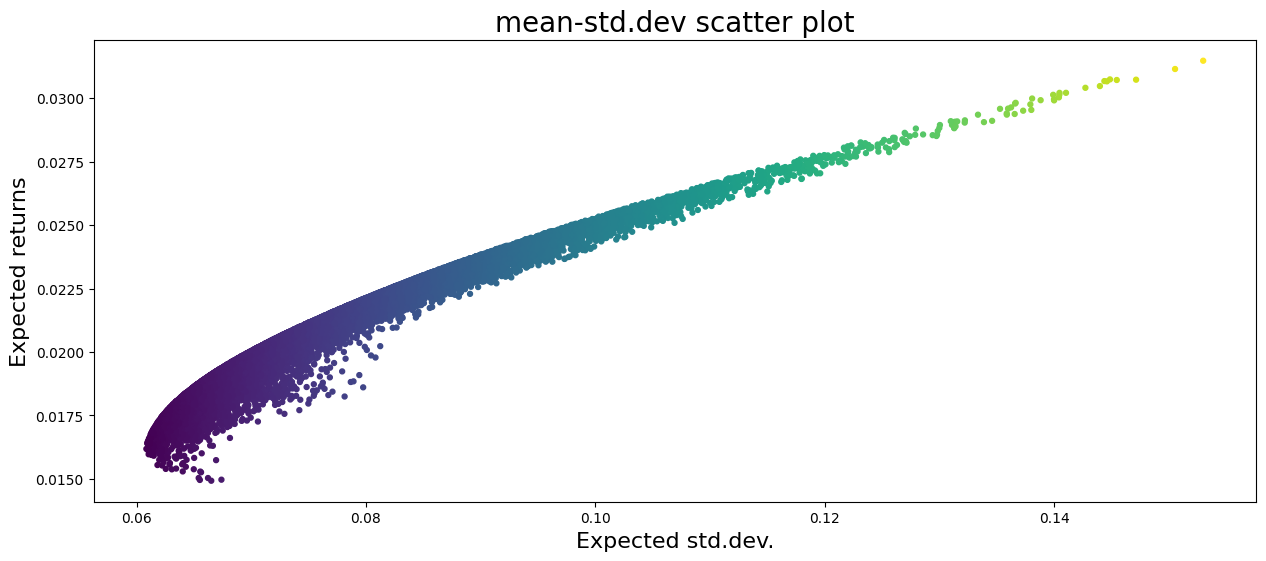

In [5]:
# Now compute the scatter plot of possible portfolio
no_portfolio = 25000

weights = np.zeros((no_portfolio, 4))
expected_ret = np.zeros(no_portfolio)
expected_volatility = np.zeros(no_portfolio)


for k in range(no_portfolio):
    # Generate random numbers
    w = np.array(np.random.random(4))
    w = w/np.sum(w)
    weights[k,:] = w
    expected_ret[k] = np.sum(w*mean_logret)
    expected_volatility[k] = np.sqrt(np.dot(w.T, np.dot(sigma_logret,w)))

    # Now a nice plot!

# Create a figure with the specified dimensions
plt.figure(figsize=(fig_width, fig_height))

# Adding labels and title
plt.scatter(expected_volatility, expected_ret, c=expected_volatility, marker='.', s=50)
plt.ylabel('Expected returns', fontsize=16)
plt.xlabel('Expected std.dev.', fontsize=16)
plt.title('mean-std.dev scatter plot', fontsize=20)

w*:  [ 0.32        0.25296808 -0.00070952  0.42774144]
Expected return:  0.016999999999218085
Expected volatility:  0.06244789883416962


Text(0.5, 1.0, 'mean-variance scatter plot, arrogant investor way')

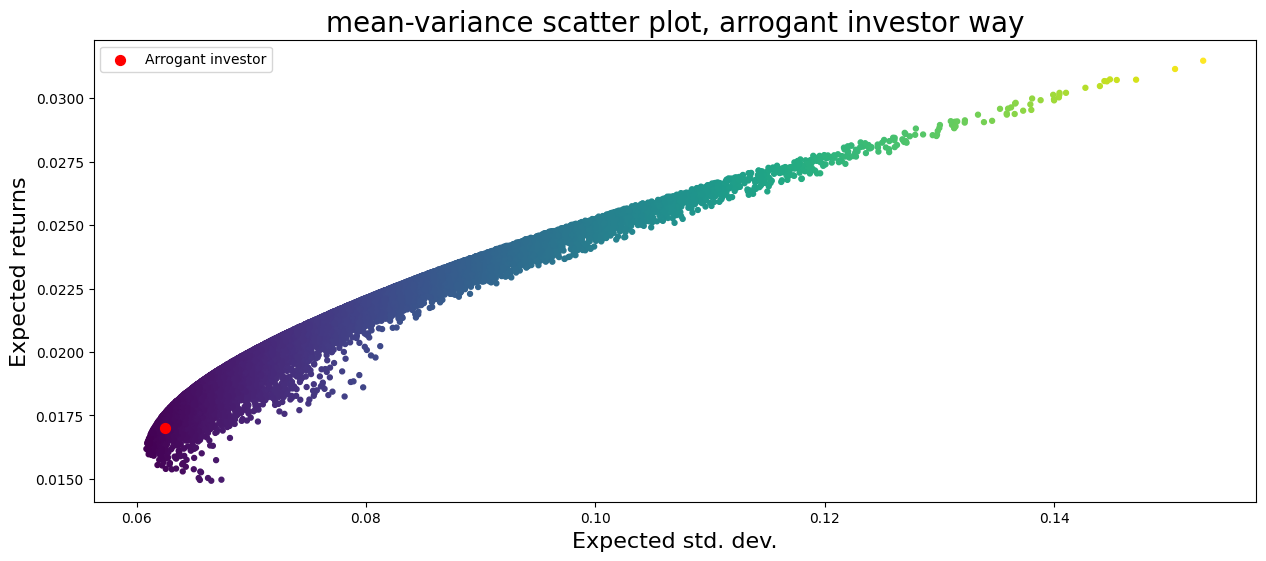

In [6]:
# ANSWER (This is computed by considering the constraints imposed by our client)
# FILL THE GAP
r_min = 0.017

def portfolio_variance(w):
    " This function compute the portfolio variance"
    return np.sqrt(np.dot(w.T, np.dot(sigma_logret,w)))

def check_sum_to_one(w):
    "This function checks that weights sum up to one"
    return np.sum(w) - 1

def minimum_return(w):
    "This function allows to guarantee that the minimum desired return is achieved"
    return np.sum(w*mean_logret) - r_min

# Initial guess
w0 = np.array([0.25, 0.25, 0.25, 0.25])

# Bounds for weights
bounds = ((-.24, .32), (0, 1), (-.44, .44), (0, 1))

# Constraints
constraints = ({'type': 'eq', 'fun': check_sum_to_one},  # Equality constraint
               {'type': 'ineq', 'fun': minimum_return})     # Inequality constraint (default >= 0)

# Optimization routine
results = minimize(portfolio_variance ,x0=w0, method="SLSQP", bounds=bounds, constraints=constraints)

w_star = results.x

# Plot the position of the couple (volatility, return) into the scatter plot.

print("w*: ", w_star)

expected_volatility_w_star = np.sqrt(np.dot(w_star.T, np.dot(sigma_logret,w_star)))
expected_ret_w_star = np.sum(w_star*mean_logret)

print("Expected return: ", expected_ret_w_star)
print("Expected volatility: ", expected_volatility_w_star)

# Create a figure with the specified dimensions
plt.figure(figsize=(fig_width, fig_height))

# Adding labels and title
plt.scatter(expected_volatility, expected_ret, c=expected_volatility, marker='.', s=50)
plt.scatter(expected_volatility_w_star, expected_ret_w_star, c='r', marker='o', s=50, label='Arrogant investor')
plt.ylabel('Expected returns', fontsize=16)
plt.xlabel('Expected std. dev.', fontsize=16)
plt.legend()
plt.title('mean-variance scatter plot, arrogant investor way', fontsize=20)

This portfolio is not on the frontier. Why is this? 

This is due to client's constraints. The client basically forced some unecessary constraints on some weights. The computed portfolio is consistent, meaning that it is located con the admissible set, but it is not on the frontier. 

This result tells us that it is a necessary, but NOT sufficient, condition for the portfolio to follow the $\mathbf{1}^{T}w = 1$ constraint for it to be on the efficient frontier.

Indeed, if we remove the constraints on the weights, we can find the portfolio on the efficient frontier, which, at the same level of expected return, has a lower variance.

w*:  [0.45756913 0.16773782 0.0345119  0.34018115]
Expected return:  0.016999999999218085
Expected volatility:  0.06244789883416962


Text(0.5, 1.0, 'mean-std.dev. scatter plot, efficient way')

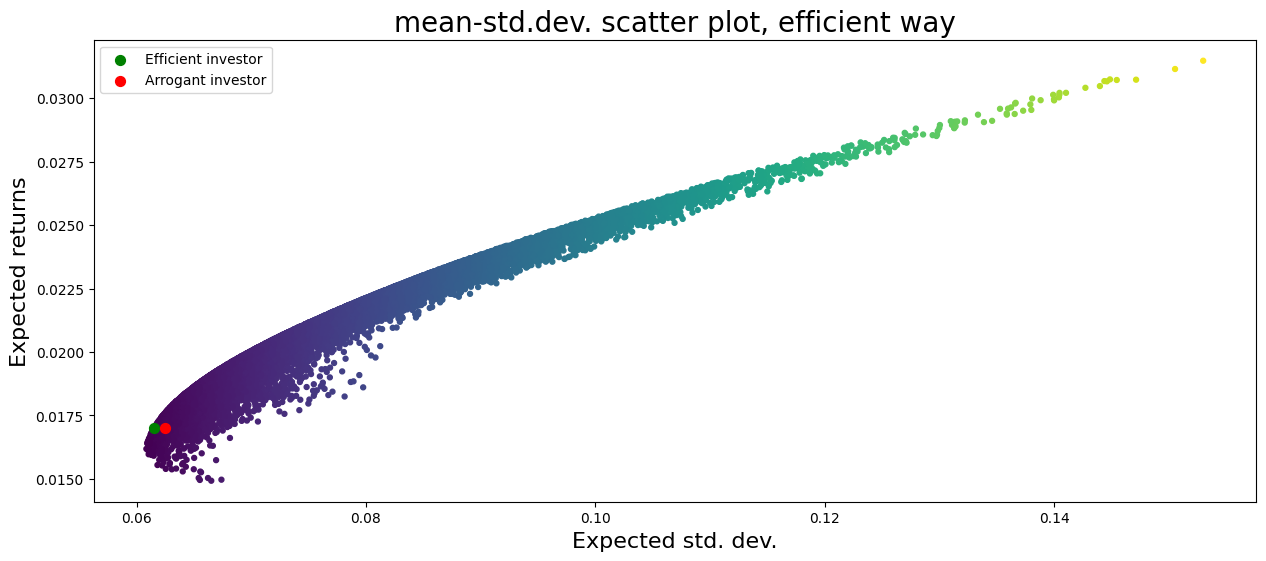

In [7]:
# ANSWER (This is computed without considering the constraints imposed by our client --> It's better!)
# FILL THE GAP
r_min = 0.017

def portfolio_variance(w):
    " This function compute the portfolio variance"
    return np.sqrt(np.dot(w.T, np.dot(sigma_logret,w)))

def check_sum_to_one(w):
    "This function checks that weights sum up to one"
    return np.sum(w) - 1

def minimum_return(w):
    "This function allows to guarantee that the minimum desired return is achieved"
    return np.sum(w*mean_logret) - r_min

# Initial guess
w0 = np.array([0.25, 0.25, 0.25, 0.25])

# Bounds for weights
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

# Constraints
constraints = ({'type': 'eq', 'fun': check_sum_to_one},  # Equality constraint
               {'type': 'ineq', 'fun': minimum_return})     # Inequality constraint (default >= 0)?

# Optimization routine
results = minimize(portfolio_variance ,x0=w0, method="SLSQP", bounds=bounds, constraints=constraints)

w_star = results.x

# Plot the position of the couple (volatility, return) into the scatter plot.

print("w*: ", w_star)

expected_volatility_w_star_efficient = np.sqrt(np.dot(w_star.T, np.dot(sigma_logret,w_star)))
expected_ret_w_star_efficient = np.sum(w_star*mean_logret)

print("Expected return: ", expected_ret_w_star)
print("Expected volatility: ", expected_volatility_w_star)

# Create a figure with the specified dimensions
plt.figure(figsize=(fig_width, fig_height))

# Adding labels and title
plt.scatter(expected_volatility, expected_ret, c=expected_volatility, marker='.', s=50)
plt.scatter(expected_volatility_w_star_efficient, expected_ret_w_star_efficient, c='g', marker='o', s=50, label='Efficient investor')
plt.scatter(expected_volatility_w_star, expected_ret_w_star, c='r', marker='o', s=50, label='Arrogant investor')
plt.ylabel('Expected returns', fontsize=16)
plt.xlabel('Expected std. dev.', fontsize=16)
plt.legend()
plt.title('mean-std.dev. scatter plot, efficient way', fontsize=20)

You can check that the composition of the efficient portfolio was not possible because of the client's constraints, in particular on the weights of Google: $-0.24 \leq w_{google} \leq 0.32$. 

## Efficient frontier with $n$ risky assets and a risk-free asset

Recall the Second Mutual Found Theorem (Proposition 5):

In presence of a risk-free asset with return $r_{0} < \underline{\mu}$, the optimal portfolio is the linear combination
between the risk-free asset and the tangent portfolio $T$.


Create the efficient frontieer with $n$ risky asset. Any optimal portfolio is a linear combination of risky assets and the risk-free. Given a level of variance the investor tends to maximize the expected return.

Can you verify numerically that this results holds true for the portfolio including the four stocks and the risk free?

- Plot the region of feasible risky portfolio and plot the efficient frontieer.
- Solve the same problem considering also the risk-free asset.
- Plot the expected return and the standard deviation of the portfolio. 
- Check that it stayes on the Capital Market Line (The line connecting the risk-free portfolio to the tangent portfolio).

Let's first recall what the Sharpe ratio is:

$$
\begin{align*}
\text{Sharpe ratio} & = \frac{\mu_{p} - r_{0}}{\sigma_{p}}
\end{align*}
$$

where:
- $\mu_{p}$ is the expected return of the portfolio;
- $r_{0}$ is the risk-free rate;
- $\sigma_{p}$ is the standard deviation of the portfolio.

You can consider the Sharpe ratio also component-wise, meaning that you can compute the Sharpe ratio for each asset in the portfolio, that is:

$$
\begin{align*}
\text{Sharpe ratio}_{i} & = \frac{\mu_{i} - r_{0}}{\sigma_{i}}
\end{align*}
$$

where:
- $\mu_{i}$ is the expected return of the asset $i$;
- $r_{0}$ is the risk-free rate;
- $\sigma_{i}$ is the standard deviation of the asset $i$.


The Market Portfolio is the portfolio that is on the efficient frontier and has the highest Sharpe ratio. (WHY?)

The Capital Market Line is the line that connects the risk-free portfolio to the Market Portfolio.

The Capital Market Line is given by the equation:

$$
\begin{align*}
\mu_{p} & = r_{0} + \frac{\mu_{T} - r_{0}}{\sigma_{T}}\sigma_{p}
\end{align*}
$$

where:
- $\mu_{p}$ is the expected return of the portfolio;
- $r_{0}$ is the risk-free rate;
- $\mu_{T}$ is the expected return of the Market Portfolio;
- $\sigma_{T}$ is the standard deviation of the Market Portfolio;
- $\sigma_{p}$ is the standard deviation of the portfolio.



In [8]:
# run all the previous code and then run the following cell
risk_free = (1 + 0.05) ** (1 / 12) - 1 # 5% annual interest rate
risk_free_vect = np.ones(4)*risk_free

print("The risk-free rate is: ", risk_free)

sigma_logret_r0 = np.hstack((np.zeros((4,1)), sigma_logret))
sigma_logret_r0 = np.vstack((np.zeros((1,5)), sigma_logret_r0))
mean_logret_r0 = np.insert(arr=np.array(mean_logret), obj=0 ,values=risk_free)

print("\nMean: ", mean_logret_r0)

print("\nCovariance matrix (SINGULAR):\n", sigma_logret_r0)

The risk-free rate is:  0.0040741237836483535

Mean:  [0.00407412 0.0145592  0.0186785  0.03273158 0.01785942]

Covariance matrix (SINGULAR):
 [[0.         0.         0.         0.         0.        ]
 [0.         0.00465509 0.00316485 0.00355029 0.00235029]
 [0.         0.00316485 0.00715358 0.00471129 0.00321175]
 [0.         0.00355029 0.00471129 0.02663049 0.00495111]
 [0.         0.00235029 0.00321175 0.00495111 0.00612546]]


In order to tackle this problem, we can use the following steps:
1. Compute the efficient frontier for the risky assets only;
2. Compute the Market Portfolio;
3. Compute the Capital Market Line;
4. Plot the efficient frontier and the Capital Market Line.

In [9]:
# useful functions

def portfolio_volatility(w):
    " This function compute the portfolio variance"
    return np.sqrt(np.dot(w.T, np.dot(sigma_logret,w)))

def portfolio_return(w):
    " This function compute the portfolio return"
    return np.dot(w, mean_logret)

def check_sum_to_one(w):
    "This function checks that weights sum up to one"
    return np.sum(w) - 1

def minimum_return(w):
    "This function allows to guarantee that the minimum desired return is achieved"
    return np.sum(w*mean_logret) - r_min

In [10]:
# Compute the efficient frontier

r_min = risk_free

r_points = 200
r_vect = np.linspace(0.001,0.0325,r_points)

# Initial guess
w0 = np.array([0.25, 0.25, 0.25, 0.25])

# Bounds for weights
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

expected_volatility_frontieer = np.zeros(r_points)
expected_ret_frontieer = np.zeros(r_points)

for idx, r in enumerate(r_vect):

    # ANSWER

    # Constraints
    constraints = ({'type': 'eq', 'fun': check_sum_to_one},
                   {'type': 'eq', 'fun': lambda w: portfolio_return(w) - r}) # Why is this an equality constraint? We want to find the portfolio that gives us the desired return on the efficient frontier

    # Optimization routine
    results = minimize(portfolio_volatility,x0=w0, method="SLSQP", bounds=bounds, constraints=constraints)

    # print(results)
    w_star = results.x

    expected_volatility_frontieer[idx] = np.sqrt(np.dot(w_star, np.dot(sigma_logret,w_star)))
    expected_ret_frontieer[idx] = np.sum(w_star*mean_logret)

In [11]:
# Computing all the information required for finding the market portfolio

sharpe_ratios = (expected_ret_frontieer - risk_free)/expected_volatility_frontieer
max_sharesharpe_ratio = np.max(sharpe_ratios)

print("The maximum Sharpe ratio value is: ", max_sharesharpe_ratio)
print("Achieved by the index: ", np.argmax(sharpe_ratios))

The maximum Sharpe ratio value is:  0.22830338970875672
Achieved by the index:  123


Text(0.5, 1.0, 'mean-std.dev. scatter plot')

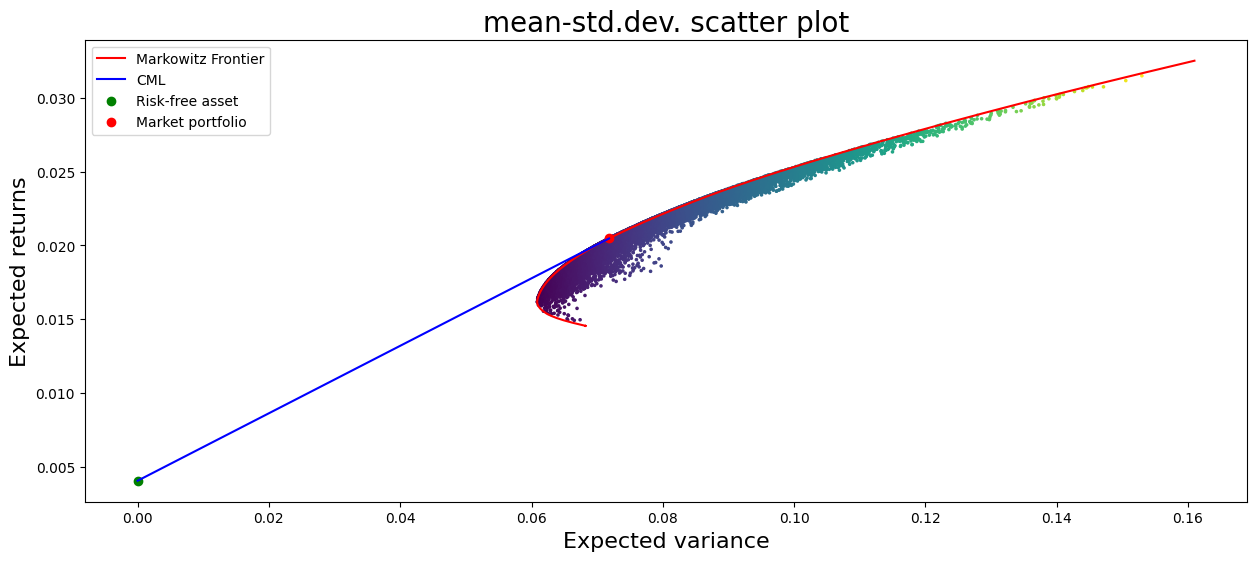

In [12]:
# Plot all the above
plt.figure(figsize=(fig_width, fig_height))

# Adding labels and title

plt.scatter(expected_volatility, expected_ret, c=expected_volatility, marker='.', s=10)
plt.plot(expected_volatility_frontieer, expected_ret_frontieer, c='r', label="Markowitz Frontier")

# capital market line
v = np.linspace(0,expected_volatility_frontieer[np.argmax(sharpe_ratios)],100)
plt.plot(v, risk_free + max_sharesharpe_ratio*v, c='b', label="CML")

plt.scatter(0, risk_free, c='g', marker='o', label="Risk-free asset")
plt.scatter(expected_volatility_frontieer[np.argmax(sharpe_ratios)], expected_ret_frontieer[np.argmax(sharpe_ratios)], c='red', marker='o', label="Market portfolio")

plt.legend()
plt.ylabel('Expected returns', fontsize=16)
plt.xlabel('Expected variance', fontsize=16)
plt.title('mean-std.dev. scatter plot', fontsize=20)

The blue line represents the Capital Market Line, in this framework, all the portfolios on this line are efficient.

In [13]:
gamma = 5

def expected_utility(w):
    "Compute the expected utility"
    return -(np.dot(w.T, mean_logret_r0)-0.5*gamma*np.dot(w.T, np.dot(sigma_logret_r0,w)))

# Initial guess
w0 = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

# Bounds for weights
bounds = ((0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

# Constraints
constraints = ({'type': 'eq', 'fun': check_sum_to_one})    # Equality constraint

# Optimization routine
# FILL THE GAP
results = minimize(expected_utility,x0=w0, method="SLSQP", bounds=bounds, constraints=constraints)

w_star_risk_free = results.x

print("w*: ", w_star_risk_free)

opt_portfolio_return = np.dot(w_star_risk_free, mean_logret_r0)
opt_portfolio_volatility = np.sqrt(np.dot(w_star_risk_free, np.dot(sigma_logret_r0,w_star_risk_free)))

print("Expected return: ", opt_portfolio_return)
print("Expected volatility: ", opt_portfolio_volatility)

w*:  [0.35227665 0.15576964 0.15079136 0.12861908 0.21254328]
Expected return:  0.01452546301244659
Expected volatility:  0.04581211216129349


Text(0.5, 1.0, 'mean-variance scatter plot')

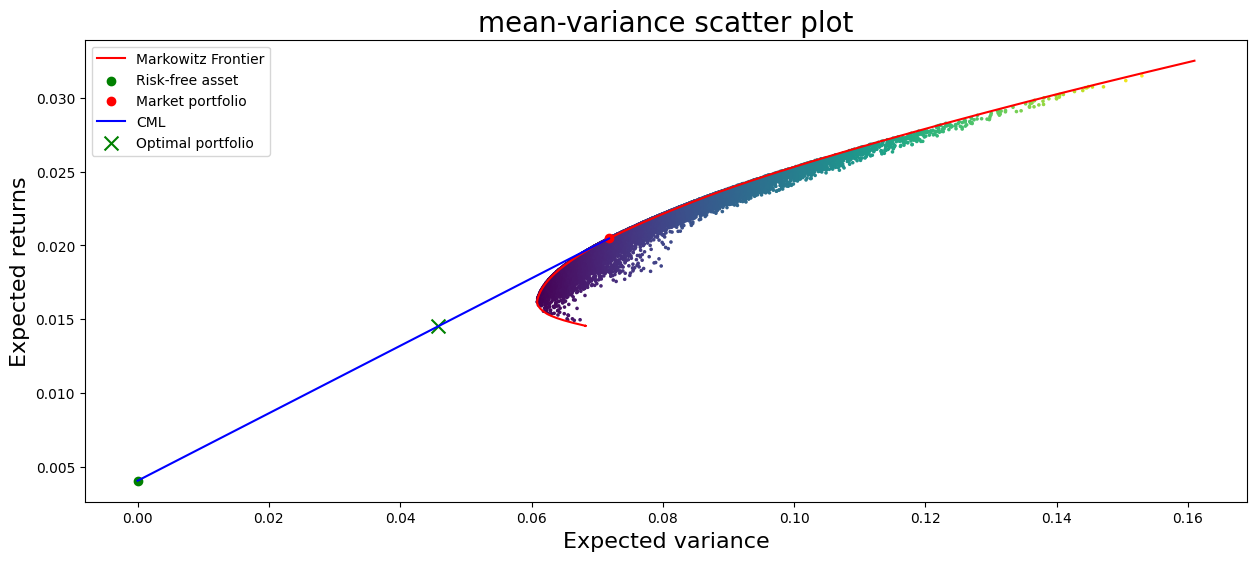

In [14]:
# Plot the optimal portfolio

plt.figure(figsize=(fig_width, fig_height))

# Adding labels and title
plt.scatter(expected_volatility, expected_ret, c=expected_volatility, marker='.', s=10)
plt.plot(expected_volatility_frontieer, expected_ret_frontieer, c='r', label="Markowitz Frontier")
plt.scatter(0, risk_free, c='g', marker='o', label="Risk-free asset")
plt.scatter(expected_volatility_frontieer[np.argmax(sharpe_ratios)], expected_ret_frontieer[np.argmax(sharpe_ratios)], c='red', marker='o', label="Market portfolio")

# capital market line
v = np.linspace(0,expected_volatility_frontieer[np.argmax(sharpe_ratios)],100)
plt.plot(v, risk_free + max_sharesharpe_ratio*v, c='b', label="CML")

plt.scatter(opt_portfolio_volatility, opt_portfolio_return, c='green', marker='x', label="Optimal portfolio", s=100)

plt.legend()
plt.ylabel('Expected returns', fontsize=16)
plt.xlabel('Expected variance', fontsize=16)
plt.title('mean-variance scatter plot', fontsize=20)

In [15]:
mkt_portfolio = expected_ret_frontieer[np.argmax(sharpe_ratios)], expected_volatility_frontieer[np.argmax(sharpe_ratios)]
mkt_portfolio = np.array(mkt_portfolio)
print("Market portfolio: ", mkt_portfolio)  

ones_vec = np.ones(4)

# Elaborate this

mu_risk_free =  mean_logret - risk_free_vect

sigma_inv = np.linalg.inv(sigma_logret)
A = np.dot(ones_vec.T, np.dot(sigma_inv, mu_risk_free))
B = np.dot(mu_risk_free.T, np.dot(sigma_inv, mu_risk_free))
C = np.dot(ones_vec.T, np.dot(sigma_inv, ones_vec))
D = B*C - A**2

a_0 = (sigma_inv @ ones_vec) / C
a_1 = (sigma_inv @ mu_risk_free) / A

mu_0 = np.dot(a_0, mu_risk_free)
mu_1 = np.dot(a_1, mu_risk_free)

sigma_0 = np.sqrt(np.dot(a_0, np.dot(sigma_logret, a_0)))
sigma_1 = np.sqrt(np.dot(a_1, np.dot(sigma_logret, a_1)))

print("a_0: ", a_0)
print("a_1: ", a_1)
print("mu_0: ", mu_0)
print("mu_1: ", mu_1)
print("sigma_0: ", sigma_0)
print("sigma_1: ", sigma_1)



Market portfolio:  [0.02046985 0.07181551]
a_0:  [ 0.54539622  0.13670811 -0.02127247  0.33916814]
a_1:  [0.20488347 0.2721601  0.20225796 0.32069846]
mu_0:  0.011780977602064386
mu_1:  0.016340071372739122
sigma_0:  0.0607713007997182
sigma_1:  0.07157063029298408


We can consistently check that the portfolio that includes the risk-free asset is on the Capital Market Line. 

## CAPM

Recall the Fundamental Value Relationship (Lemma 6):

In presence of a risk-free asset with return $r_{0}\le \underline{\mu}$. given the optimal risky portfolio, the following relation holds for every risky asset $j$:

\begin{equation*}
\mu_{j} - r_{0} = \beta_{jM}\left(\mu_{M}-r_{0}\right)
\end{equation*}

where :

\begin{equation*}
\beta_{jM} = \frac{Cov(r_{j},r_{M})}{Var(r_{M})}
\end{equation*}

The Capital Asset Pricing Model (CAPM) asserts that all investors adhere to the mean variance strategy. Moreover the asset demand is equal to the asset offer, namely we are in equilibrium. Since the market portfolio is an efficient portfolio, we have that the following relation hold:

\begin{equation*}
\mu_{i} - r_{0} = \beta_{iM}\left(\mu_{M} - r_{0}\right).
\end{equation*}
It is named the market beta and it a is a measure of sensitivity to the market. It can be viewed also as the number of units of systematic risk. On the other hand, the quantity $\mu_{M} - r_{0}$ is the market risk premium or the price per unit systematic risk.

Under the hypothesis of normal log-returns we have a formula to estimate $\beta$ which is given by:

\begin{equation*}
\beta_{i} = \frac{Cov\left[X_{i}, X_{M}\right]}{Var\left[X_{M}\right]} = \frac{\sigma_{iM}}{\sigma_{MM}},
\end{equation*}

where $\rho_{im}$ is the correlation between market and asset log-returns, wherease $\sigma_{i}$ and $\sigma_{m}$ is the volatility of asset and market log-returns, respectively. 

The same relation can be written as:

\begin{equation*}
\mu_{j} - r_{0} = \alpha_{j} + \beta_{jM}\left(\mu_{M} - r_{0}\right) + \epsilon
\end{equation*}


In the following excercize assume for simplicity that the risk-free is $r_{0}=0$.

In [16]:
"""
Data import and manipulation
"""
google = pd.read_csv(r"data_capm/GOOG.csv")
amazon = pd.read_csv(r"data_capm/AMZN.csv")
tesla = pd.read_csv(r"data_capm/TSLA.csv")
apple = pd.read_csv(r"data_capm/AAPL.csv")
microsoft = pd.read_csv(r"data_capm/MSFT.csv")
sp500 = pd.read_csv(r"data_capm/SP500.csv")

# Merge the dataframe in a single one
stocks = pd.concat([google['Close'], amazon['Close'], tesla['Close'], apple['Close'], microsoft['Close'], sp500['Close']  ],axis=1)

# Assign name to colums and dates
stocks.columns = ["google", "amazon", "tesla", "apple", "microsoft", "sp500"]
dates = google["Date"]
stocks.index = dates

# Compute log-returns and drop NaN
log_returns = np.log(stocks/stocks.shift(1))
log_returns = log_returns.dropna()

# Compute the covariance matrix and the mean of log-returns
sigma_logret = log_returns.cov()
mean_logret = log_returns.mean()

# Print the vector of expected returns and the covariance matrix
print("Expected returns: ")
print(mean_logret)

print("\nCovariance matrix")
print(sigma_logret)

Expected returns: 
google       0.013166
amazon       0.017956
tesla        0.025400
apple        0.019972
microsoft    0.019297
sp500        0.008120
dtype: float64

Covariance matrix
             google    amazon     tesla     apple  microsoft     sp500
google     0.004579  0.003940  0.004304  0.002600   0.002640  0.001036
amazon     0.003940  0.007784  0.006421  0.003756   0.003202  0.000956
tesla      0.004304  0.006421  0.026892  0.006634   0.003725  0.002054
apple      0.002600  0.003756  0.006634  0.006204   0.002829  0.001243
microsoft  0.002640  0.003202  0.003725  0.002829   0.003663  0.000844
sp500      0.001036  0.000956  0.002054  0.001243   0.000844  0.001246


In [17]:
# Explicit computation

sigma_asset = sigma_logret['sp500'][:-1].values  # Asset volatility (each asset against the market)
market_variance = sigma_logret['sp500'][-1]*np.ones(len(sigma_asset))  # Market volatility

print("sigma market:", market_variance)
print("sigma assets:", sigma_asset)

# Compute the beta of the assets
beta_explicit = np.divide(sigma_asset,market_variance)

print("beta explicit:", beta_explicit)

sigma market: [0.0012457 0.0012457 0.0012457 0.0012457 0.0012457]
sigma assets: [0.00103613 0.00095574 0.00205353 0.00124251 0.0008445 ]
beta explicit: [0.83176223 0.76722887 1.64849019 0.99743273 0.67792916]


In [18]:
# Linear regressions (using numpy and exploiting the system of normal equations)

# In the linear algebra fashion

# Select the log returns from the SP500 market.
x = log_returns['sp500']

y = log_returns[['google', 'amazon', 'tesla', 'apple', 'microsoft']]

A = np.concatenate((np.ones((len(x),1)), x.values.reshape(-1,1)), axis=1)

b_google = y.values[:,0]
b_amazon = y.values[:,1]
b_tesla = y.values[:,2]
b_apple = y.values[:,3]
b_microsoft = y.values[:,4]

x_google = np.linalg.inv(A.T @ A) @ A.T @ b_google
x_amazon = np.linalg.inv(A.T @ A) @ A.T @ b_amazon
x_tesla = np.linalg.inv(A.T @ A) @ A.T @ b_tesla
x_apple = np.linalg.inv(A.T @ A) @ A.T @ b_apple
x_microsoft = np.linalg.inv(A.T @ A) @ A.T @ b_microsoft

print("beta google:", x_google[1])
print("beta amazon:", x_amazon[1])
print("beta tesla:", x_tesla[1])
print("beta apple:", x_apple[1])
print("beta microsoft:", x_microsoft[1])

beta_LS = np.array([x_google[1], x_amazon[1], x_tesla[1], x_apple[1], x_microsoft[1]])

print("\nbeta LS:", beta_LS)

beta google: 0.8317622340821929
beta amazon: 0.7672288714482499
beta tesla: 1.6484901904350637
beta apple: 0.9974327346856952
beta microsoft: 0.6779291613553179

beta LS: [0.83176223 0.76722887 1.64849019 0.99743273 0.67792916]


You can check that explicit and Least Square estimates of $\beta$ are the same.

In [19]:
check = np.allclose(beta_LS, beta_explicit)
print("Check:", check)

print("Element-wise difference:", beta_LS - beta_explicit) # Machine eplison

Check: True
Element-wise difference: [-4.44089210e-16 -3.33066907e-16  0.00000000e+00  0.00000000e+00
 -2.22044605e-16]


You can check also the $\alpha$, which is the intercept of the linear regression of the asset return on the market return. It is a measure of the asset performance. If it is positive, the asset is overperforming, if it is negative, the asset is underperforming. This is called the Jensen's alpha.

In [20]:
# Jensen's alpha
alpha_google = x_google[0]
alpha_amazon = x_amazon[0]
alpha_tesla = x_tesla[0]
alpha_apple = x_apple[0]
alpha_microsoft = x_microsoft[0]

print("Jensen's alpha for Google:", alpha_google)
print("Jensen's alpha for Amazon:", alpha_amazon)
print("Jensen's alpha for Tesla:", alpha_tesla)
print("Jensen's alpha for Apple:", alpha_apple)
print("Jensen's alpha for Microsoft:", alpha_microsoft)

Jensen's alpha for Google: 0.006412207780572456
Jensen's alpha for Amazon: 0.011725873153153262
Jensen's alpha for Tesla: 0.012014294749520373
Jensen's alpha for Apple: 0.011872440028826604
Jensen's alpha for Microsoft: 0.013791927570112349


In [21]:
# Linear regressions (using statsmodels)

X = sm.add_constant(x)

model_google = sm.OLS(y['google'], X).fit()
model_amazon = sm.OLS(y['amazon'], X).fit()
model_tesla = sm.OLS(y['tesla'], X).fit()
model_apple = sm.OLS(y['apple'], X).fit()
model_microsoft = sm.OLS(y['microsoft'], X).fit()

# print betas
print("beta google:", model_google.params['sp500'])
print("beta amazon:", model_amazon.params['sp500'])
print("beta tesla:", model_tesla.params['sp500'])
print("beta apple:", model_apple.params['sp500'])
print("beta microsoft:", model_microsoft.params['sp500'])

beta_smOLS = np.array([model_google.params['sp500'], model_amazon.params['sp500'], model_tesla.params['sp500'], model_apple.params['sp500'], model_microsoft.params['sp500']])

print("\nbeta smOLS:", beta_smOLS)


beta google: 0.8317622340821931
beta amazon: 0.7672288714482501
beta tesla: 1.6484901904350644
beta apple: 0.9974327346856955
beta microsoft: 0.6779291613553182

beta smOLS: [0.83176223 0.76722887 1.64849019 0.99743273 0.67792916]


You can check that explicit and smOLS estimates of $\beta$ are the same.

In [22]:
check = np.allclose(beta_explicit, beta_smOLS)
print("Check:", check)

print("Element-wise difference:", beta_explicit - beta_smOLS) # Machine eplison

Check: True
Element-wise difference: [ 2.22044605e-16  1.11022302e-16 -6.66133815e-16 -3.33066907e-16
 -1.11022302e-16]


Also Jensen's alpha are the same.

In [23]:
# Jensen's alpha
print("Jensen's alpha for Google:", model_google.params['const'])
print("Jensen's alpha for Amazon:", model_amazon.params['const'])
print("Jensen's alpha for Tesla:", model_tesla.params['const'])
print("Jensen's alpha for Apple:", model_apple.params['const'])
print("Jensen's alpha for Microsoft:", model_microsoft.params['const'])


Jensen's alpha for Google: 0.006412207780572448
Jensen's alpha for Amazon: 0.011725873153153252
Jensen's alpha for Tesla: 0.012014294749520354
Jensen's alpha for Apple: 0.011872440028826597
Jensen's alpha for Microsoft: 0.013791927570112342
